<a href="https://colab.research.google.com/github/u5638928/u5638928-DataScience-GenAI-Submissions/blob/main/Titanic_EDA_Seminar_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To start this assessment, I need to load the data and create a data frame. I will use the prompt "Upload the data set "titanic.csv" and create a dataframe"

In [ ]:
import pandas as pd

df = pd.read_csv('/content/titanic.csv')
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The data frame seems to have bene uploaded successfully. Now I will check if there is any missing data using the code from 2.05..

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


There seems to be a lot of missing data for the cabin and secondly from age. I will delete the 'cabin' column as I feel not only would the overwhelming amount of missing data is unhelpful, but the cabin number is not a predictibve variable and acts more as an ID - label. Additionally, I would delete the rows for age. I will do this with the AI prompt, delete the column of variable 'Cabin", and delete the missing rows of data for age".  

In [ ]:
df.drop('Cabin', axis=1, inplace=True)
df.dropna(subset=['Age'], inplace=True)

print("DataFrame after dropping 'Cabin' column and rows with missing 'Age' values:")
df.info()
print("\nMissing values after operations:")
print(df.isnull().sum())

DataFrame after dropping 'Cabin' column and rows with missing 'Age' values:
<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB

Missing values after operations:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked   

Now I want to see this new data frame.

In [ ]:
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
print("Value counts for 'Sex' after encoding:")
print(df['Sex'].value_counts())

Value counts for 'Sex' after encoding:
Sex
0    453
1    261
Name: count, dtype: int64


Now I want to convert the bivariate categorical data of sex into Male: 0 and Female:1 . I will use AI with the prompt "change the category in variable sex from male to 0 and female to 1"

In [ ]:
df_encoded_sex = df.copy() # Create a copy of the current df
print("New DataFrame 'df_encoded_sex' with 'Sex' variable encoded:")
display(df_encoded_sex.head())

New DataFrame 'df_encoded_sex' with 'Sex' variable encoded:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


Now I want to check the descriptive statistics section and know a little more about the data. I will use a code from "2.05..."

In [ ]:
df.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


/tmp/ipython-input-757099196.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, palette='viridis')


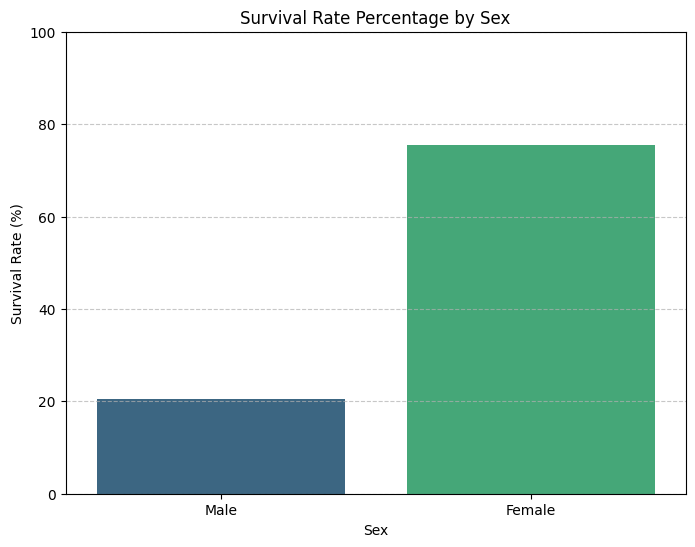

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate survival rate percentage by sex
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100

# Map the numeric 'Sex' back to original labels for better readability in the plot
survival_by_sex = survival_by_sex.rename(index={0: 'Male', 1: 'Female'})

plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, palette='viridis')
plt.title('Survival Rate Percentage by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
total_passengers = df['Survived'].count()
survivors = df['Survived'].sum() # Assuming 1 represents survived

survival_percentage = (survivors / total_passengers) * 100

print(f"Total passengers: {total_passengers}")
print(f"Number of survivors: {survivors}")
print(f"Percentage of survival: {survival_percentage:.2f}%")

Total passengers: 714
Number of survivors: 290
Percentage of survival: 40.62%


This is interestig information. We can see that the age range is from infancy (0.4 age) to 80 years seniority.

Now I will want to investigate the relationship in age to survival rate using a  bar chart

I have asked AI to change the binary survival column into a percdntage so it is more easily comparable, and will act as the Y variable in this case. From the bar chart, we can see that females unproprotionally survive more than males. This is interesting because I would think there would be no correlation between the survival rates and gender. I would think it woul be perhaps the rows of of missing data i deleted due to the age column. Perhaps more males were in the rows I deleted. If it is not due to a data preperation mistake, I will invetsigate more variabels to find a pattern.

I will check the relationhip between survuval rate and p class.

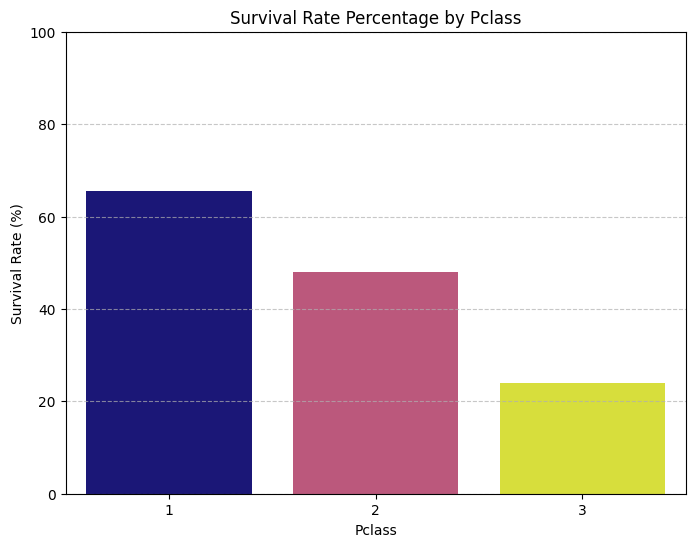

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate survival rate percentage by Pclass
survival_by_pclass = df.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values, palette='plasma', hue=survival_by_pclass.index, legend=False)
plt.title('Survival Rate Percentage by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

We can see that more people in upper class survived than the other 2 classes. This could perhaps show us insight into why females survived more than males, as maybe more females were in upper class, resulting in higher proportion of females surviving. I will chec this with the AI prompt: compare Pclass with sex using a chart.

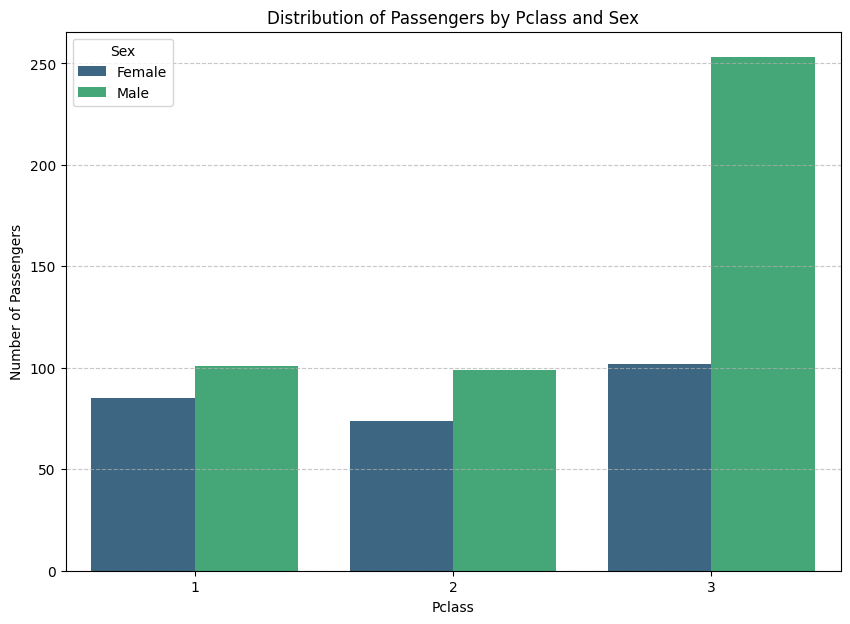

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map the numeric 'Sex' back to original labels for better readability in the plot
df_temp = df.copy()
df_temp['Sex_Label'] = df_temp['Sex'].map({0: 'Male', 1: 'Female'})

plt.figure(figsize=(10, 7))
sns.countplot(data=df_temp, x='Pclass', hue='Sex_Label', palette='viridis')
plt.title('Distribution of Passengers by Pclass and Sex')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sex')
plt.show()

We can see that there were more males than females in first class, which still doesnt clear up any understanding of why females survived more. Therefore I would conclude that it was due to the missing data rows deleted, that maybe would have had more data counts of males.

Now I would want to see the distribution of data for age and survival rate using a scatter plot using AI.

/tmp/ipython-input-844612434.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_rate_by_age_group, x='Age_Group', y='Survival Rate (%)', palette='viridis')


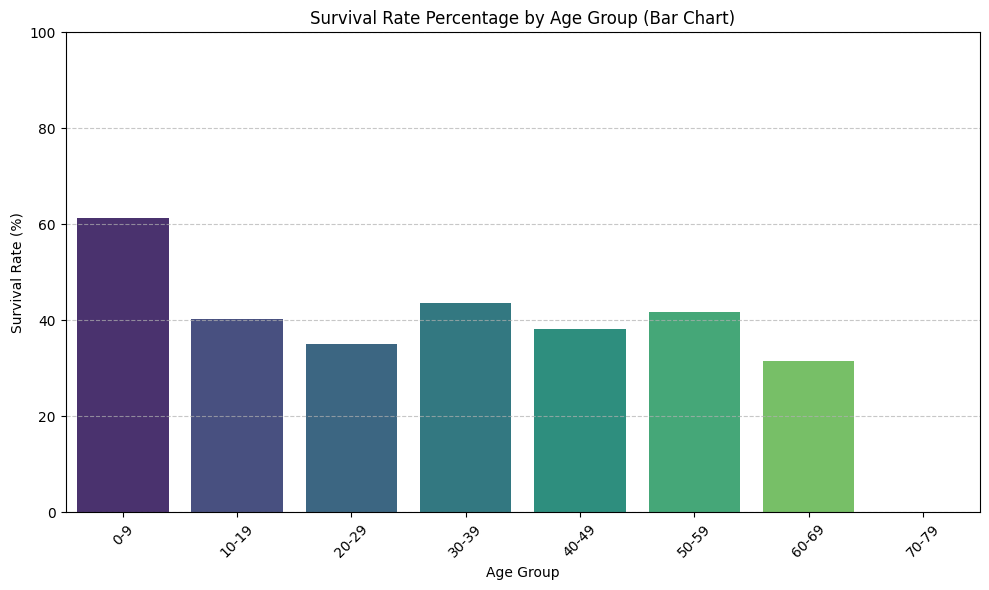

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=survival_rate_by_age_group, x='Age_Group', y='Survival Rate (%)', palette='viridis')
plt.title('Survival Rate Percentage by Age Group (Bar Chart)')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

/tmp/ipython-input-2645623340.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Age'], bins=20, kde=True, palette='viridis')


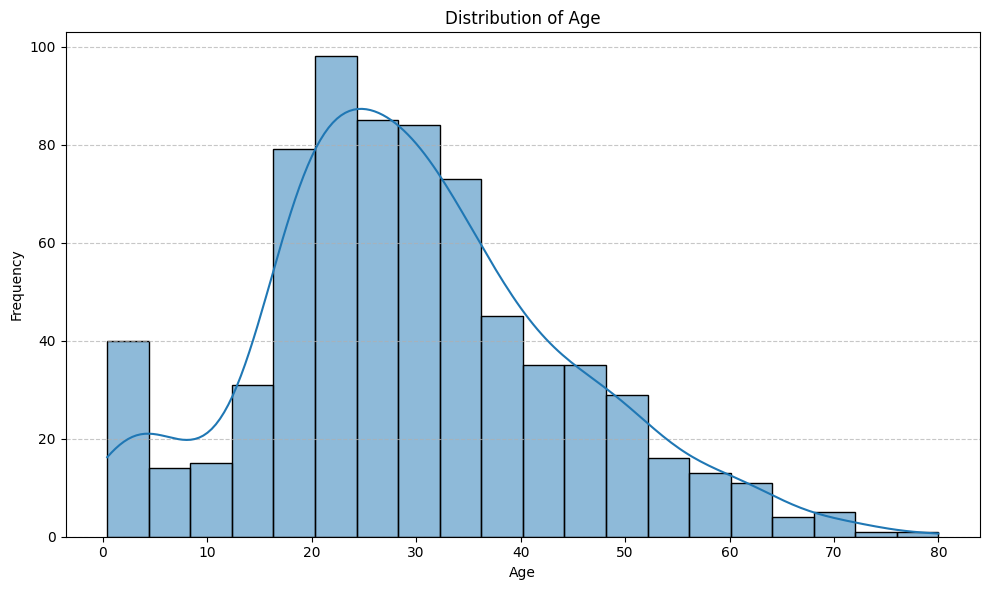

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can see that the histogra of age is slightly skewed to the left

# Task
Analyze the relationship between age and survival rate in the `df` DataFrame by creating age bins, calculating survival rates for each age group, and visualizing this relationship with a scatter plot, then summarize the findings.

## Bin Age into Groups

### Subtask:
Create age bins from the 'Age' column in the DataFrame to allow for the calculation of survival rates per age segment.


**Reasoning**:
To create age bins from the 'Age' column, I need to define the bin edges and corresponding labels, then use `pd.cut()` to assign each passenger to an age group and create a new 'Age_Group' column.



In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print("DataFrame with new 'Age_Group' column:")
display(df.head())

DataFrame with new 'Age_Group' column:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,30-39
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,30-39


**Reasoning**:
With the age groups defined, the next step is to calculate the survival rate for each age group to prepare for visualization and analysis.



In [ ]:
survival_rate_by_age_group = df.groupby('Age_Group')['Survived'].mean().reset_index()
survival_rate_by_age_group['Survival Rate (%)'] = survival_rate_by_age_group['Survived'] * 100

print("Survival rate by Age Group:")
display(survival_rate_by_age_group)

Survival rate by Age Group:


/tmp/ipython-input-1778613171.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_group = df.groupby('Age_Group')['Survived'].mean().reset_index()


,Age_Group,Survived,Survival Rate (%)
0,0-9,0.612903,61.290323
1,10-19,0.401961,40.196078
2,20-29,0.350000,35.000000
3,30-39,0.437126,43.712575
4,40-49,0.382022,38.202247
5,50-59,0.416667,41.666667
6,60-69,0.315789,31.578947
7,70-79,0.000000,0.000000


**Reasoning**:
The previous code produced a `FutureWarning` due to the behavior of `groupby` with categorical columns. Adding `observed=False` will explicitly retain the current behavior and silence the warning, ensuring consistent results.



In [ ]:
survival_rate_by_age_group = df.groupby('Age_Group', observed=False)['Survived'].mean().reset_index()
survival_rate_by_age_group['Survival Rate (%)'] = survival_rate_by_age_group['Survived'] * 100

print("Survival rate by Age Group:")
display(survival_rate_by_age_group)

Survival rate by Age Group:


,Age_Group,Survived,Survival Rate (%)
0,0-9,0.612903,61.290323
1,10-19,0.401961,40.196078
2,20-29,0.350000,35.000000
3,30-39,0.437126,43.712575
4,40-49,0.382022,38.202247
5,50-59,0.416667,41.666667
6,60-69,0.315789,31.578947
7,70-79,0.000000,0.000000


**Reasoning**:
The subtask requires visualizing the relationship between age and survival rate using a scatter plot. I have already calculated the survival rates for each age group, so the next step is to generate a scatter plot using this data to display the trend.



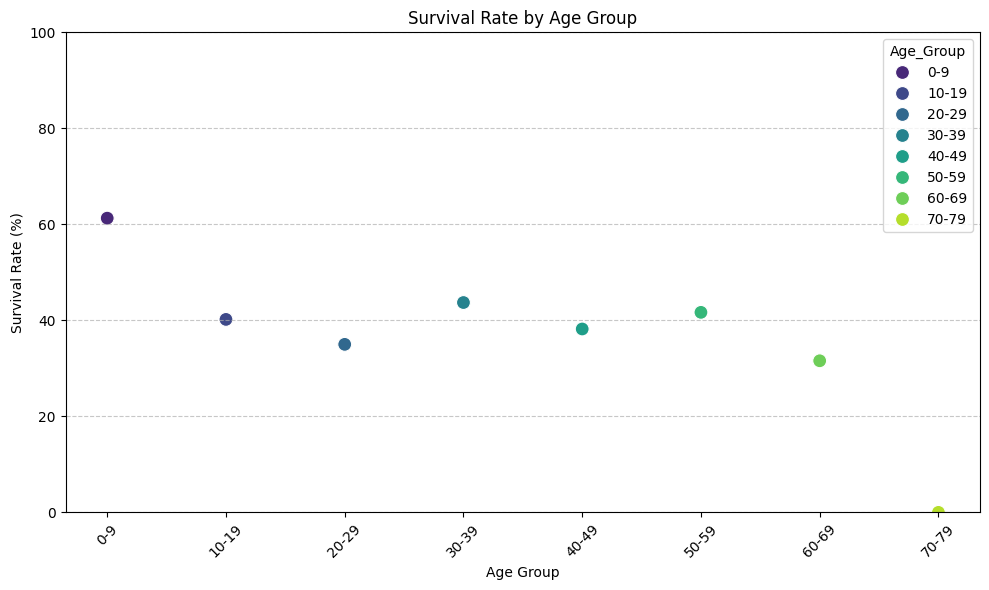

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=survival_rate_by_age_group, x='Age_Group', y='Survival Rate (%)', s=100, hue='Age_Group', palette='viridis', legend='full')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Summary of Findings: Age and Survival Rate

The scatter plot illustrates the relationship between age groups and survival rates. It appears that:

*   **Children (0-9 years old)** have the highest survival rate, suggesting a 'children first' policy or greater efforts to save younger passengers.
*   **Survival rates generally decrease** from the younger age groups, reaching a low point in the 20-29 and 60-69 age groups.
*   **Elderly passengers (70-79 years old)** show a 0% survival rate in this dataset, which is a significant observation, though the sample size for this group might be small.
*   The **middle-aged groups (30-59)** show fluctuating survival rates, generally higher than young adults but lower than children.

## Summary:

### Data Analysis Key Findings

*   Children aged 0-9 years old exhibited the highest survival rate, suggesting a potential 'children first' policy during the event.
*   Survival rates generally decreased from younger age groups, with a low point observed in the 20-29 and 60-69 age groups.
*   The 70-79 age group had a 0% survival rate in the dataset, indicating a severe disadvantage for this oldest group.
*   Middle-aged groups (30-59 years old) showed fluctuating survival rates, generally higher than young adults but lower than children.

### Insights or Next Steps

*   The stark difference in survival rates across age groups highlights that age was a significant factor influencing survival outcomes. Further analysis could explore other demographic factors (e.g., sex, passenger class) within these age groups to understand their combined impact on survival.
*   The 0% survival rate for the 70-79 age group warrants a deeper investigation into the sample size for this group and specific circumstances that might have contributed to such a low survival rate.


Now I want to have a better understanding of the age variable, and will explore this through creating a histogram of age. This will help me visualise the data better.